In [14]:
%pip install pandas
%pip install numpy
%pip install openpyxl
%pip install pingouin


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import pandas as pd
import rad_reader
import importlib
importlib.reload(rad_reader)
import rad_reader
import pingouin as pg

In [16]:
excel_file = r'C:\Users\chirr\OneDrive - Case Western Reserve University\MRE_Radiology-Scoring.xlsx'

sheet1 = pd.read_excel(excel_file, sheet_name='Amit-David-Combination-pruned')
sheet2 = pd.read_excel(excel_file, sheet_name='MRE-Severity-Score-Sheet')

merged_df = pd.merge(sheet1, sheet2, how='inner', left_on='patient_id', right_on='alias_mrn')
merged_df.drop(["record_id","alias_mrn"],axis=1,inplace=True)

#print(merged_df)

new_column_order = [
    'studyUID', 'patient_id', 
    'severity_inflammation_vas', 'severity_fibrosis_vas', 
    'Bin_sev_inf_co70', 'Bin_sev_fib_co70', 
    'rvas-inflammation', 'rvas-chronic_non_inflammation_f', 
    'fibrosis-Amit', 'inflammation-Amit', 'inflammationConfidence-Amit', 
    'fibrosisConfidence-Amit', 'fibrosis-David', 'inflammation-David', 
    'inflammationConfidence-David', 'fibrosisConfidence-David'
]

# Reorder the dataframe columns
merged_df = merged_df[new_column_order]



print(merged_df.columns.tolist())
output_csv = 'merged_output.csv'
merged_df.to_csv(output_csv, index=False)


['studyUID', 'patient_id', 'severity_inflammation_vas', 'severity_fibrosis_vas', 'Bin_sev_inf_co70', 'Bin_sev_fib_co70', 'rvas-inflammation', 'rvas-chronic_non_inflammation_f', 'fibrosis-Amit', 'inflammation-Amit', 'inflammationConfidence-Amit', 'fibrosisConfidence-Amit', 'fibrosis-David', 'inflammation-David', 'inflammationConfidence-David', 'fibrosisConfidence-David']


In [17]:
#Reshuffle amit Phase 2 data

csv_file = r'C:\Users\chirr\Downloads\amit_phase2_scoring.csv'

amit_phase2 = pd.read_csv(csv_file)
amit_phase2.drop(columns=['user','scored','updated_at', amit_phase2.columns[amit_phase2.columns.str.match('Unnamed')][0]], inplace=True)

columns_order = ['studyUID','fibrosis','inflamation','inflamationConfidence','fibrosisConfidence']
amit_phase2 = amit_phase2[columns_order]

# Modify column names excluding 'scored' and 'studyUID'
for col in amit_phase2.columns:
    if col not in ['studyUID']:
        amit_phase2.rename(columns={col: f'{col}-Amit-P2'}, inplace=True)


output_csv = 'amit_phase2.csv'
amit_phase2.to_csv(output_csv, index=False)


In [18]:

csv_file = r'C:\Users\chirr\Downloads\namita_phase2_scoring.csv'

namita_phase2 = pd.read_csv(csv_file)
namita_phase2.drop(columns=['scored','user','updated_at', namita_phase2.columns[namita_phase2.columns.str.match('Unnamed')][0]], inplace=True)

columns_order = ['studyUID','fibrosis','inflamation','inflamationConfidence','fibrosisConfidence']
namita_phase2 = namita_phase2[columns_order]

# Modify column names excluding 'scored' and 'studyUID'
for col in namita_phase2.columns:
    if col not in ['scored', 'studyUID']:
        namita_phase2.rename(columns={col: f'{col}-Namita-P2'}, inplace=True)



output_csv = 'namita_phase2.csv'
namita_phase2.to_csv(output_csv, index=False)




In [19]:

csv_file = r'C:\Users\chirr\Downloads\dhb_phase2_scoring.csv'

dhb_phase2 = pd.read_csv(csv_file)
dhb_phase2.drop(columns=['scored','user','updated_at', dhb_phase2.columns[dhb_phase2.columns.str.match('Unnamed')][0]], inplace=True)

columns_order = ['studyUID','fibrosis','inflamation','inflamationConfidence','fibrosisConfidence']
dhb_phase2 = dhb_phase2[columns_order]

# Modify column names excluding 'scored' and 'studyUID'
for col in dhb_phase2.columns:
    if col not in ['scored', 'studyUID']:
        dhb_phase2.rename(columns={col: f'{col}-David-P2'}, inplace=True)



output_csv = 'dhb_phase2.csv'
dhb_phase2.to_csv(output_csv, index=False)


In [20]:

temp= pd.merge(namita_phase2,amit_phase2 , how='inner', left_on='studyUID',right_on='studyUID')
merged_df_ph2=pd.merge(temp,dhb_phase2 , how='inner', left_on='studyUID',right_on='studyUID')

print(merged_df_ph2)
output_csv = 'phase2_merged_output.csv'
merged_df_ph2.to_csv(output_csv, index=False)


                                        studyUID  fibrosis-Namita-P2  \
0   2.25.138093792598866614038735732787542158346                  70   
1   2.25.151381364609798322676278269381385726101                  58   
2   2.25.167372640697919929902164027163864542030                  69   
3   2.25.178449996666269068405877780772401025468                  61   
4   2.25.203973463754770981792232862473688168375                  53   
5   2.25.216283113382784026636267261939114924832                  55   
6   2.25.221058046032357948728258383661711473328                  55   
7   2.25.232582791538005160080971896794988597956                  63   
8   2.25.258739232505059357398963826621831264293                  56   
9   2.25.284861718200016017166547777228412707191                  69   
10  2.25.295801654971975741640282033013061930731                  70   
11     2.25.380626357412436661274227771918760742                  50   
12   2.25.53148617108557862603965981880595662674                

In [21]:

merged_df_ph1and2=pd.merge(merged_df,merged_df_ph2 , how='inner', left_on='studyUID',right_on='studyUID')

print(merged_df_ph1and2)
output_csv = 'phase1&2_merged_output.csv'
merged_df_ph1and2.to_csv(output_csv, index=False)

                                        studyUID  patient_id  \
0   2.25.151381364609798322676278269381385726101      349083   
1   2.25.167372640697919929902164027163864542030      349086   
2   2.25.203973463754770981792232862473688168375      349087   
3   2.25.216283113382784026636267261939114924832      349081   
4   2.25.221058046032357948728258383661711473328      349093   
5   2.25.232582791538005160080971896794988597956      349095   
6   2.25.284861718200016017166547777228412707191      349089   
7   2.25.295801654971975741640282033013061930731      349104   
8      2.25.380626357412436661274227771918760742      349079   
9    2.25.53148617108557862603965981880595662674      349102   
10   2.25.68129857782908845466287502318659855334      349082   
11   4.1.113453313111044526189508214191578352716      350487   
12   4.1.132493925113990105019102207574826662035      350476   
13   4.1.171710890028688713673962063022896372906      350470   
14    4.1.179203017970274517891955900095

SignificanceResult(statistic=np.float64(-0.09732965028132701), pvalue=np.float64(0.643482481171014))
PearsonRResult(statistic=np.float64(-0.13515606587022633), pvalue=np.float64(0.5194788042645997))


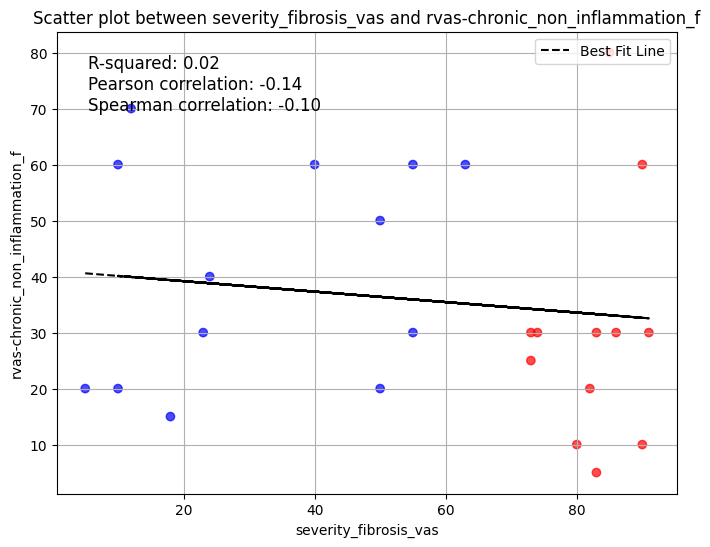

SignificanceResult(statistic=np.float64(0.15357907975910887), pvalue=np.float64(0.46359045586498027))
PearsonRResult(statistic=np.float64(0.07599364883304417), pvalue=np.float64(0.7180710095411462))


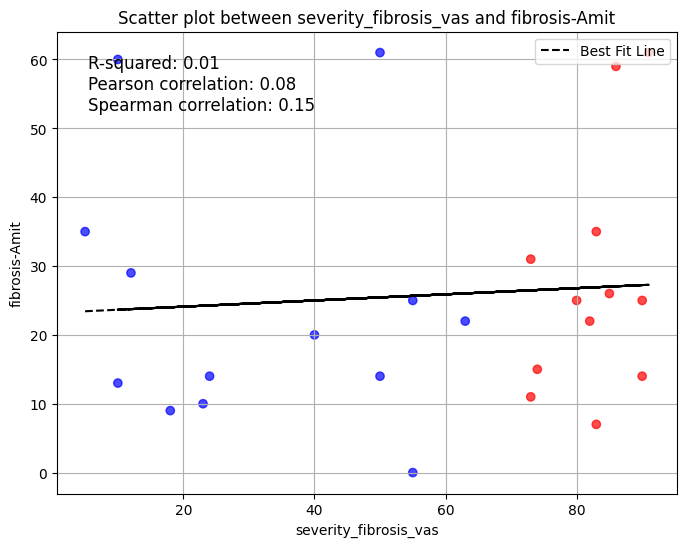

SignificanceResult(statistic=np.float64(0.14990367201663768), pvalue=np.float64(0.47448381067241496))
PearsonRResult(statistic=np.float64(0.1119855268001659), pvalue=np.float64(0.5940732265977972))


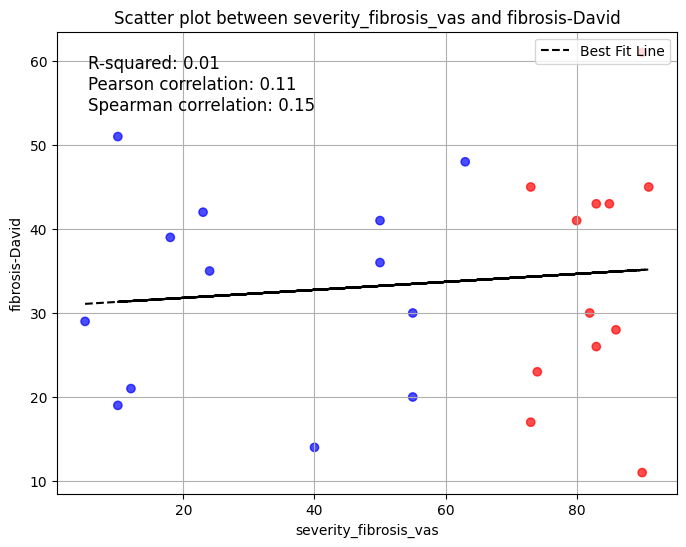

SignificanceResult(statistic=np.float64(0.09452968408891571), pvalue=np.float64(0.6531003012786917))
PearsonRResult(statistic=np.float64(0.1317288911561497), pvalue=np.float64(0.5302208101984013))


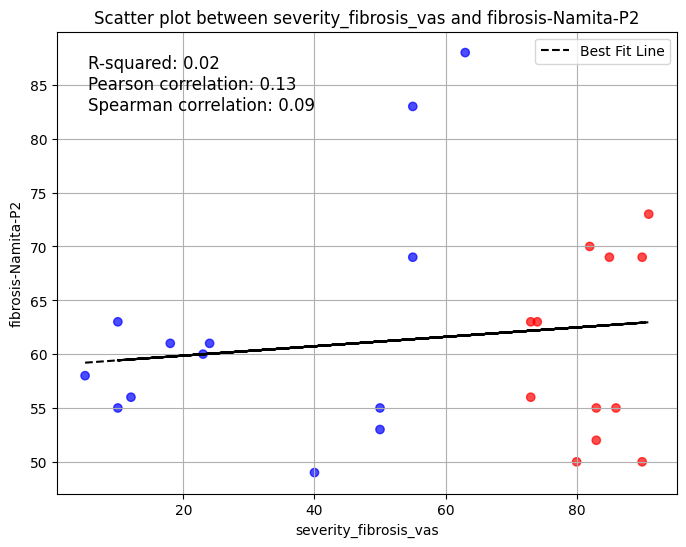

SignificanceResult(statistic=np.float64(-0.1707787201233616), pvalue=np.float64(0.4143861648936501))
PearsonRResult(statistic=np.float64(-0.1796959256116856), pvalue=np.float64(0.3900599649221513))


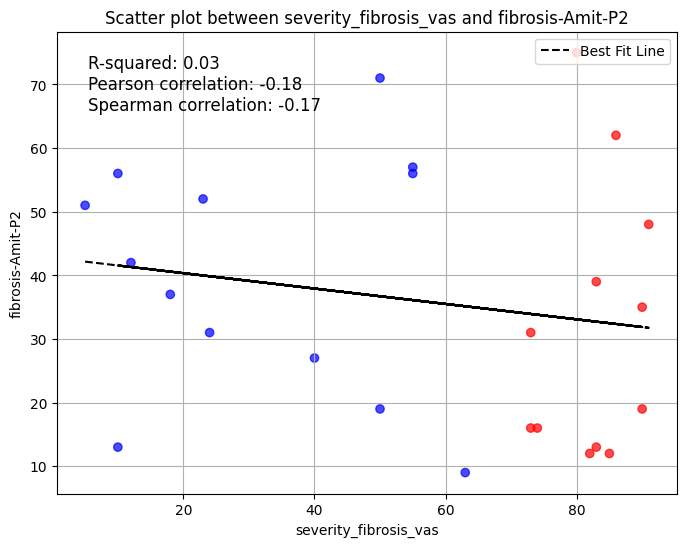

SignificanceResult(statistic=np.float64(-0.16226131416760117), pvalue=np.float64(0.43838259348144804))
PearsonRResult(statistic=np.float64(-0.07958652518819301), pvalue=np.float64(0.7053111916935771))


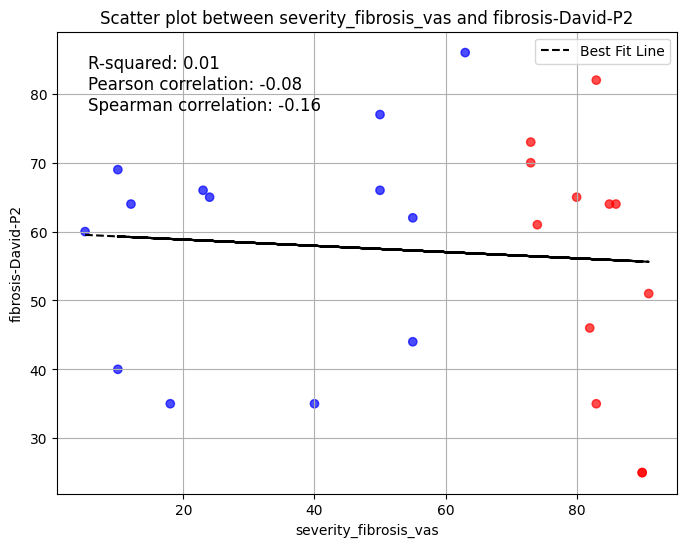

In [22]:
#pairs_fibrosis=[('fibrosis-Amit-P2','fibrosis-David'),('fibrosis','fibrosis-Amit-P2'),('fibrosis-Amit-P2','severity_fibrosis_vas'),]
#pairs_inflammation=[('inflammation-Amit-P2','inflammation-David'),('inflammation','inflammation-Amit-P2'),('inflammation-Amit-P2','severity_inflammation_vas')]
import matplotlib.pyplot as plt
import os

pairs_fibrosis=[('severity_fibrosis_vas','rvas-chronic_non_inflammation_f'),
                ('severity_fibrosis_vas','fibrosis-Amit'),
                ('severity_fibrosis_vas','fibrosis-David'),
                ('severity_fibrosis_vas','fibrosis-Namita-P2'),
                ('severity_fibrosis_vas','fibrosis-Amit-P2'),
                ('severity_fibrosis_vas','fibrosis-David-P2'),
                ]
output_dir = "figures"
os.makedirs(output_dir, exist_ok=True)

for  pairs in pairs_fibrosis:
    rad_reader.scatter_with_best_fit(pairs[0], pairs[1], merged_df_ph1and2, color=merged_df_ph1and2['Bin_sev_fib_co70'].values)

SignificanceResult(statistic=np.float64(0.15054590780469773), pvalue=np.float64(0.4725709185279431))
PearsonRResult(statistic=np.float64(0.0040467156994210916), pvalue=np.float64(0.9846833893021957))


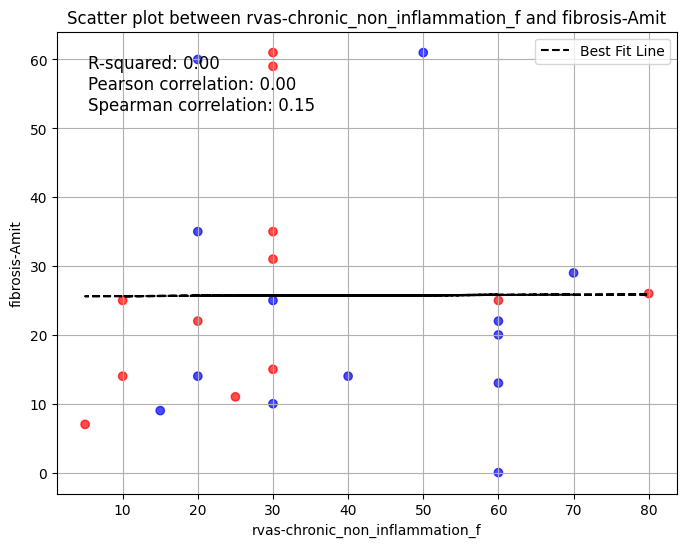

SignificanceResult(statistic=np.float64(0.2999025657406404), pvalue=np.float64(0.14525013093303094))
PearsonRResult(statistic=np.float64(0.25543790402795064), pvalue=np.float64(0.21780995028155847))


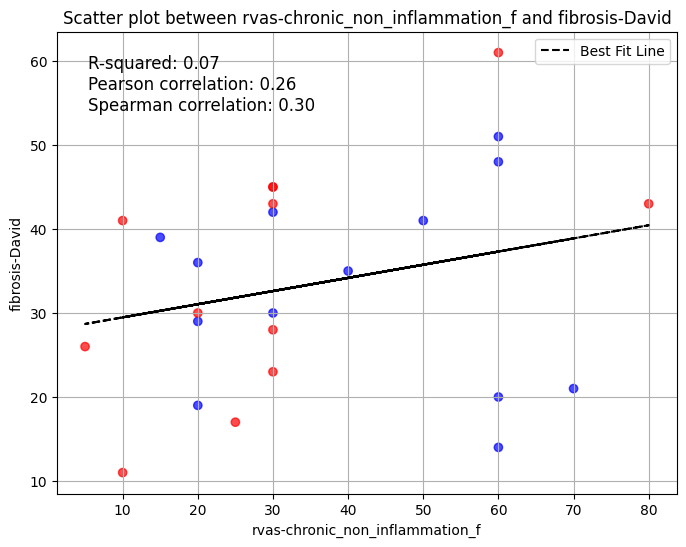

SignificanceResult(statistic=np.float64(0.4287477211052745), pvalue=np.float64(0.03247625369417884))
PearsonRResult(statistic=np.float64(0.4365045158405033), pvalue=np.float64(0.029142870543328977))


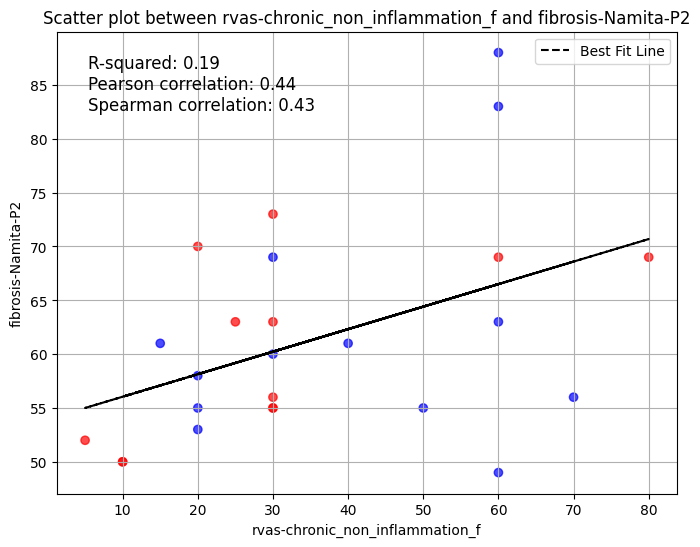

SignificanceResult(statistic=np.float64(-0.155688273588843), pvalue=np.float64(0.45739837455236265))
PearsonRResult(statistic=np.float64(-0.20131867019385902), pvalue=np.float64(0.33455066759168334))


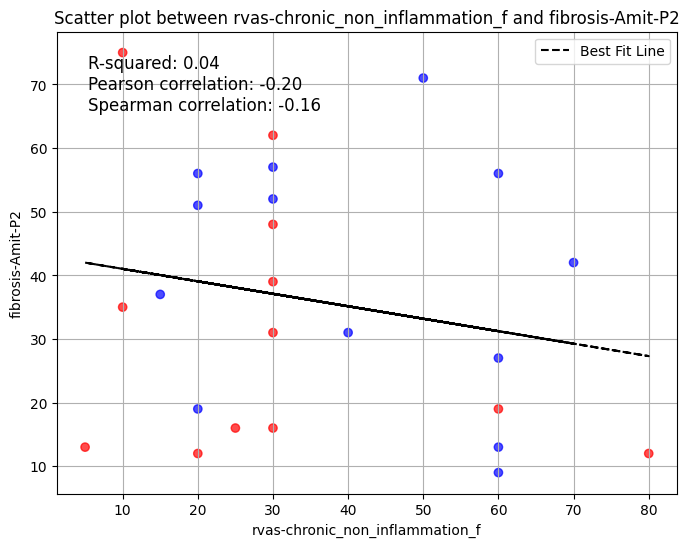

SignificanceResult(statistic=np.float64(0.10173610175864338), pvalue=np.float64(0.628459134990049))
PearsonRResult(statistic=np.float64(0.13146449231033513), pvalue=np.float64(0.5310538818596242))


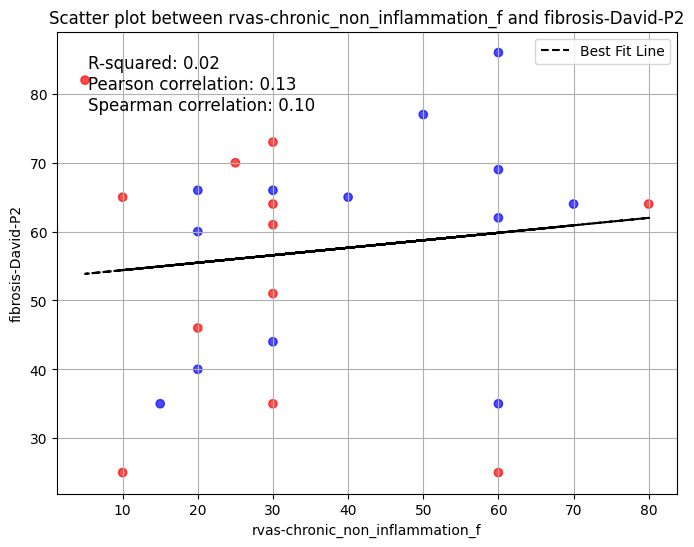

SignificanceResult(statistic=np.float64(0.24011593723989227), pvalue=np.float64(0.24762944462930475))
PearsonRResult(statistic=np.float64(0.1436217048983497), pvalue=np.float64(0.49340189852122424))


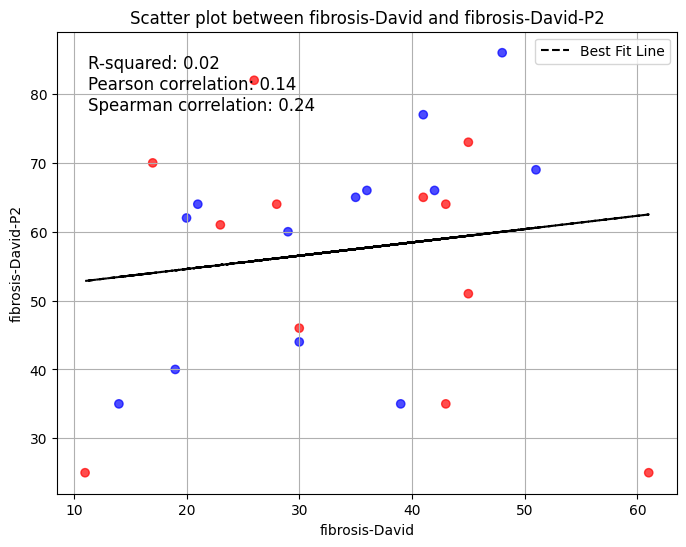

SignificanceResult(statistic=np.float64(0.38954291712768946), pvalue=np.float64(0.054252280283677186))
PearsonRResult(statistic=np.float64(0.5013986565837729), pvalue=np.float64(0.010666821696803153))


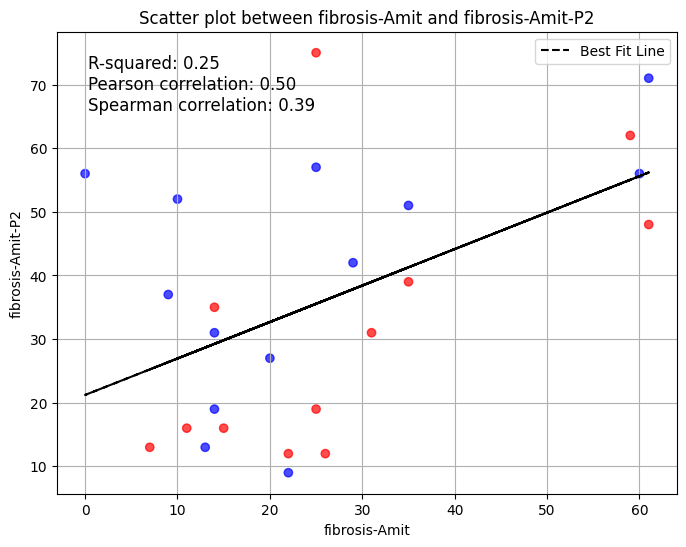

SignificanceResult(statistic=np.float64(0.9999999999999999), pvalue=np.float64(1.586425303066468e-181))
PearsonRResult(statistic=np.float64(1.0), pvalue=np.float64(0.0))


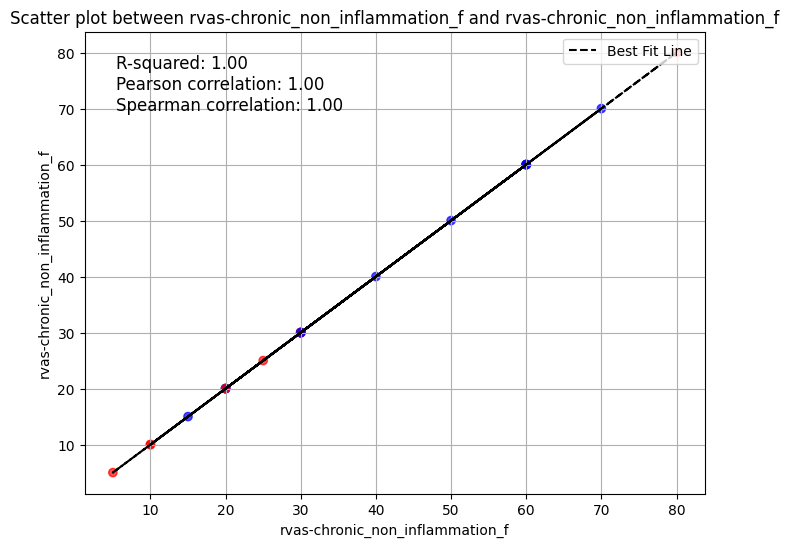

In [23]:

pairs_fibrosis=[('rvas-chronic_non_inflammation_f','fibrosis-Amit'),
                ('rvas-chronic_non_inflammation_f','fibrosis-David'),
                ('rvas-chronic_non_inflammation_f','fibrosis-Namita-P2'),
                ('rvas-chronic_non_inflammation_f','fibrosis-Amit-P2'),
                ('rvas-chronic_non_inflammation_f','fibrosis-David-P2'),
                ('fibrosis-David','fibrosis-David-P2'),
                ('fibrosis-Amit','fibrosis-Amit-P2'),
                ('rvas-chronic_non_inflammation_f','rvas-chronic_non_inflammation_f')]
output_dir = "figures"
os.makedirs(output_dir, exist_ok=True)

for  pairs in pairs_fibrosis:
    rad_reader.scatter_with_best_fit(pairs[0], pairs[1], merged_df_ph1and2, color=merged_df_ph1and2['Bin_sev_fib_co70'].values)

SignificanceResult(statistic=np.float64(0.5066811733189873), pvalue=np.float64(0.009745486967348897))
PearsonRResult(statistic=np.float64(0.4692618647376075), pvalue=np.float64(0.017957437129443952))


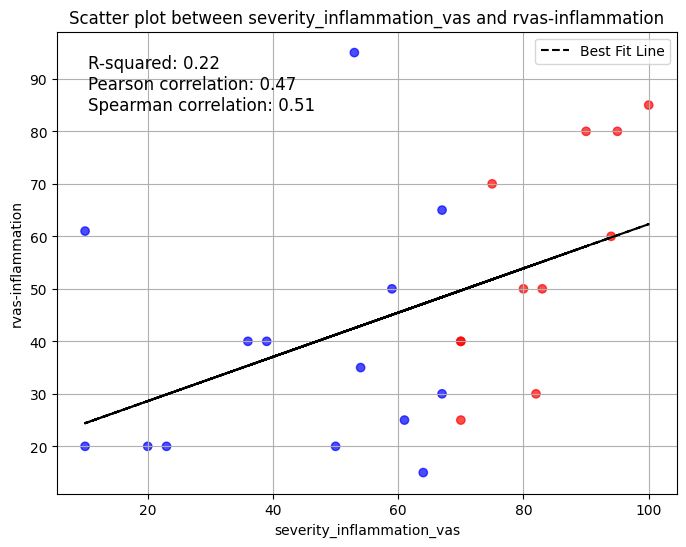

SignificanceResult(statistic=np.float64(0.36603700848111026), pvalue=np.float64(0.0719350979194433))
PearsonRResult(statistic=np.float64(0.36058065732854166), pvalue=np.float64(0.07660711128850696))


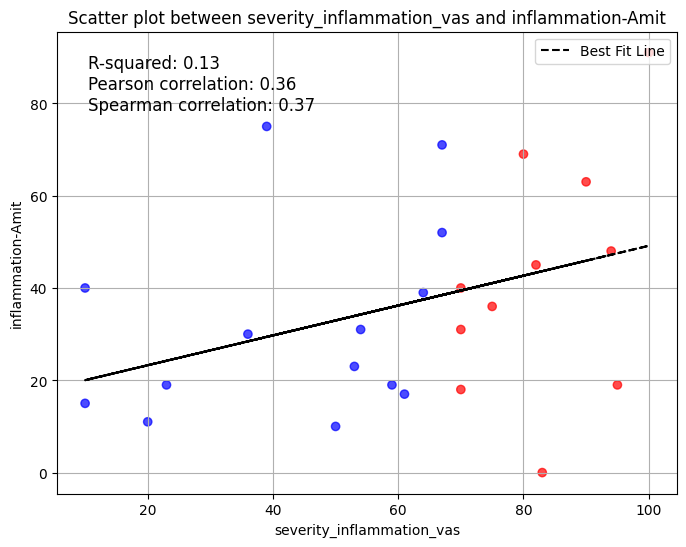

SignificanceResult(statistic=np.float64(0.44255975327679253), pvalue=np.float64(0.026736379802921366))
PearsonRResult(statistic=np.float64(0.4848123370087868), pvalue=np.float64(0.01404065884652151))


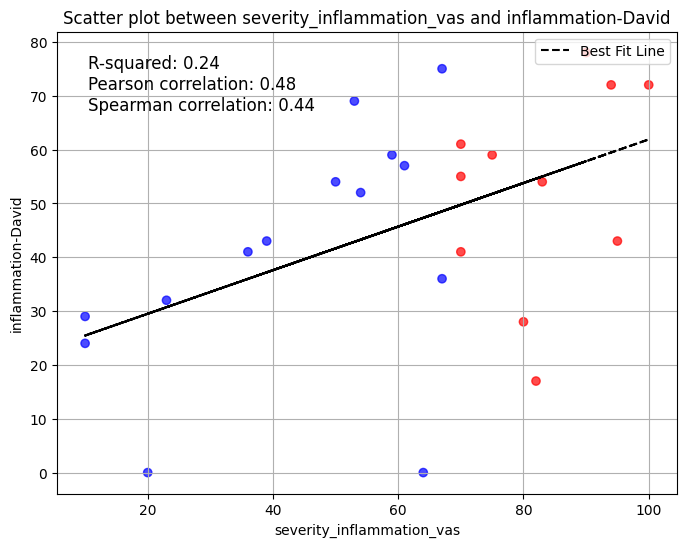

SignificanceResult(statistic=np.float64(0.2821746970320107), pvalue=np.float64(0.1717497283881162))
PearsonRResult(statistic=np.float64(0.2633633911585094), pvalue=np.float64(0.2033733030349705))


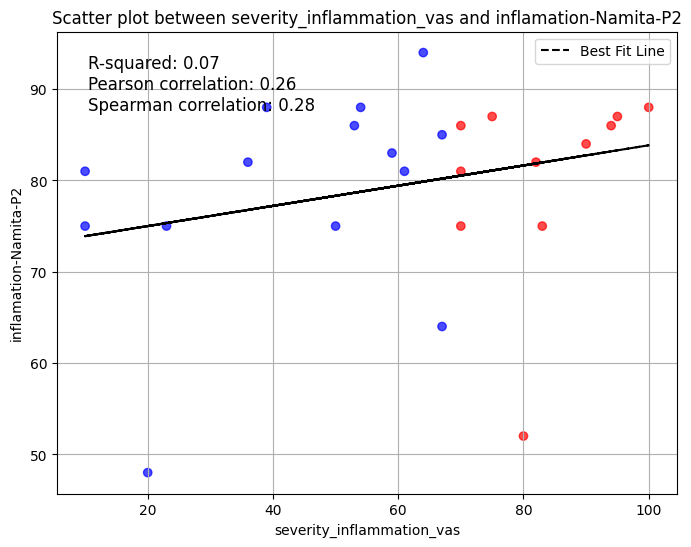

SignificanceResult(statistic=np.float64(0.46985174480975933), pvalue=np.float64(0.017794126454494682))
PearsonRResult(statistic=np.float64(0.525901068389581), pvalue=np.float64(0.006931549357142643))


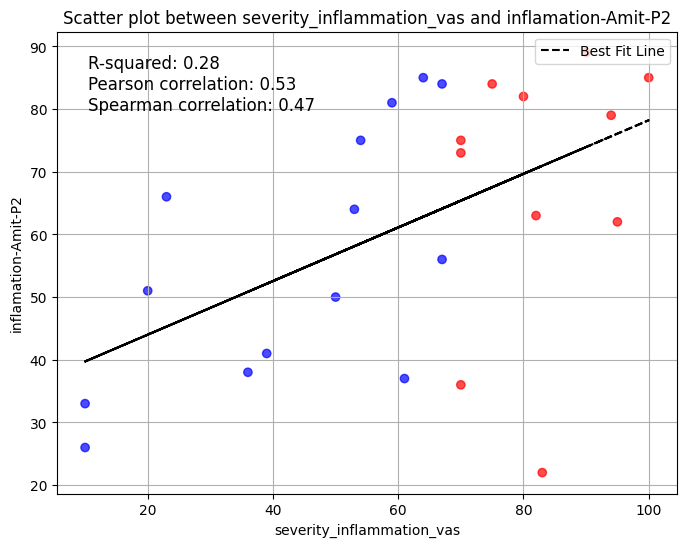

SignificanceResult(statistic=np.float64(0.6764366102719398), pvalue=np.float64(0.00020530267954272456))
PearsonRResult(statistic=np.float64(0.5862294189739992), pvalue=np.float64(0.0020726183319730762))


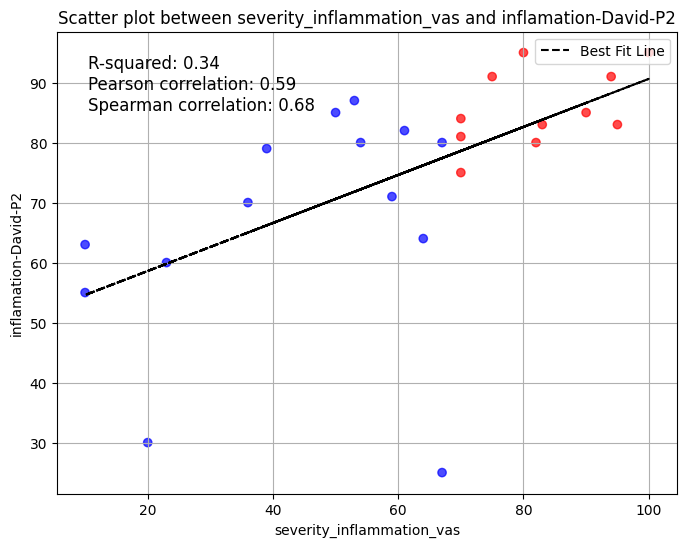

In [24]:
pairs_inflammation=[('severity_inflammation_vas','rvas-inflammation'),
                ('severity_inflammation_vas','inflammation-Amit'),
                ('severity_inflammation_vas','inflammation-David'),
                ('severity_inflammation_vas','inflamation-Namita-P2'),
                ('severity_inflammation_vas','inflamation-Amit-P2'),
                ('severity_inflammation_vas','inflamation-David-P2')]
for pairs in pairs_inflammation:
    rad_reader.scatter_with_best_fit(pairs[0],pairs[1],merged_df_ph1and2 ,color=merged_df_ph1and2['Bin_sev_inf_co70'].values)

SignificanceResult(statistic=np.float64(0.9999999999999999), pvalue=np.float64(1.586425303066468e-181))
PearsonRResult(statistic=np.float64(0.9999999999999998), pvalue=np.float64(4.594778479182612e-178))


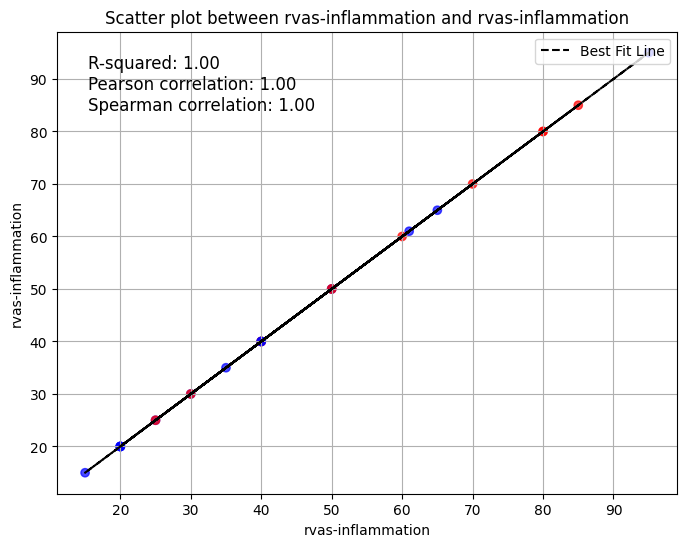

SignificanceResult(statistic=np.float64(0.2966929865156637), pvalue=np.float64(0.14981650928708815))
PearsonRResult(statistic=np.float64(0.31635284370782774), pvalue=np.float64(0.1233992080600088))


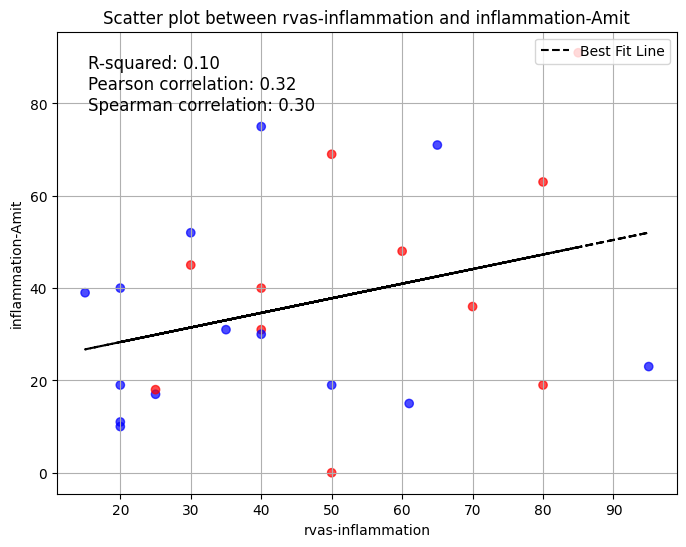

SignificanceResult(statistic=np.float64(0.5937730480300433), pvalue=np.float64(0.001752832952533377))
PearsonRResult(statistic=np.float64(0.6049433939202866), pvalue=np.float64(0.0013572513956094728))


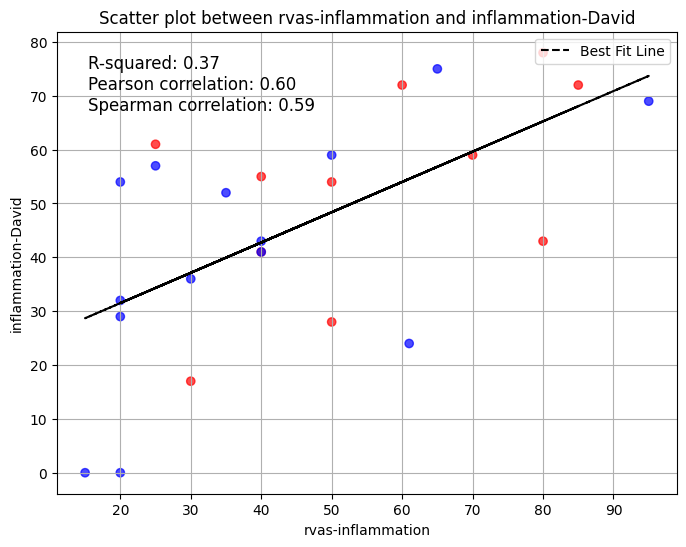

SignificanceResult(statistic=np.float64(0.42284530373631135), pvalue=np.float64(0.03521128359988421))
PearsonRResult(statistic=np.float64(0.3505066427039562), pvalue=np.float64(0.08583470171005049))


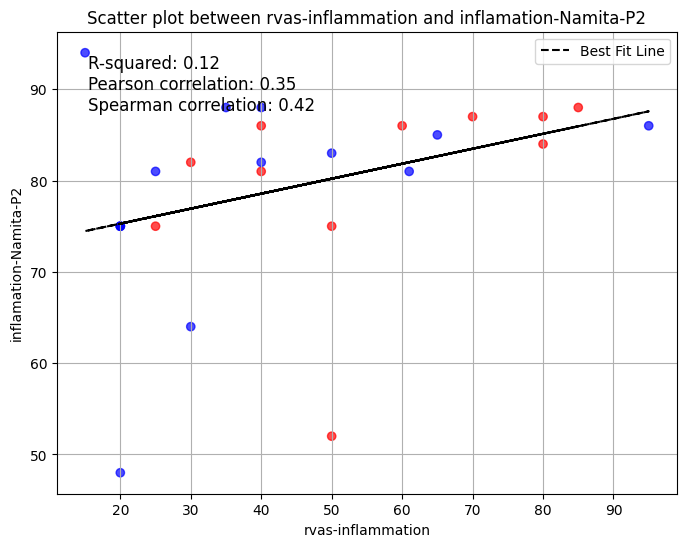

SignificanceResult(statistic=np.float64(0.27079595455312705), pvalue=np.float64(0.19043816319809212))
PearsonRResult(statistic=np.float64(0.30038869846142874), pvalue=np.float64(0.14456726344099874))


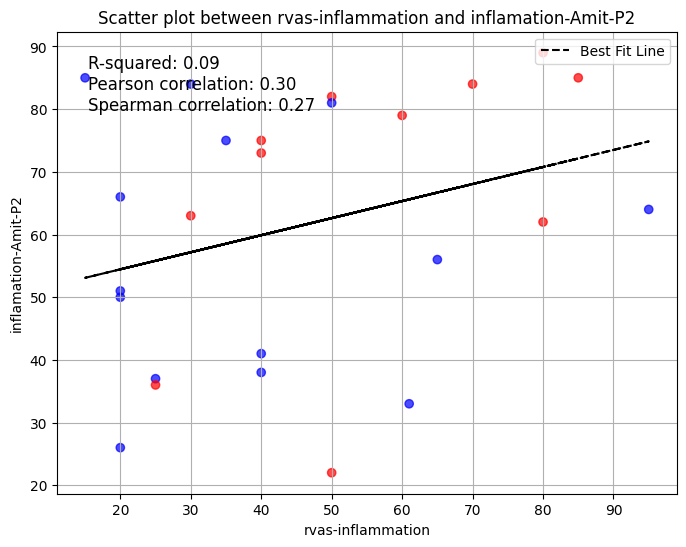

SignificanceResult(statistic=np.float64(0.5771578257236268), pvalue=np.float64(0.0025220432978794493))
PearsonRResult(statistic=np.float64(0.5131561712231469), pvalue=np.float64(0.008707302152989212))


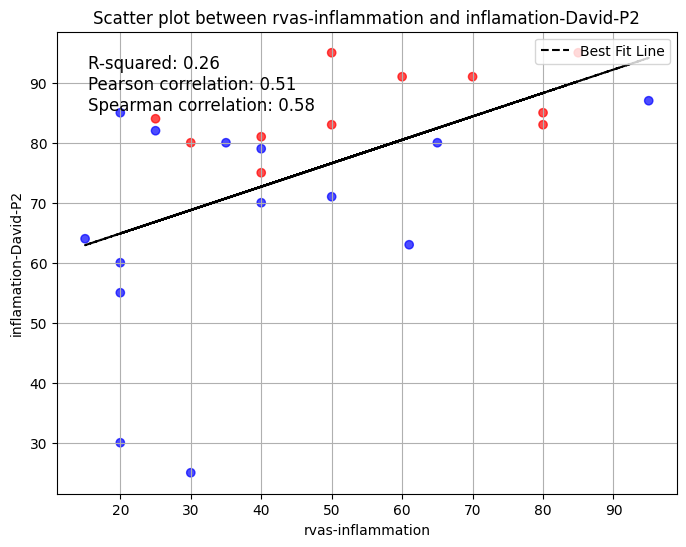

SignificanceResult(statistic=np.float64(0.5494125363663114), pvalue=np.float64(0.004445564900072898))
PearsonRResult(statistic=np.float64(0.45514518791355374), pvalue=np.float64(0.0222457707346058))


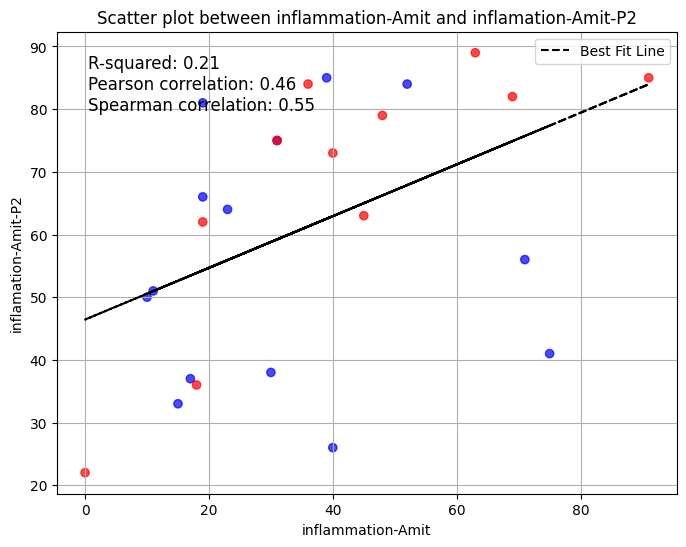

SignificanceResult(statistic=np.float64(0.6413421225098265), pvalue=np.float64(0.0005503866909561281))
PearsonRResult(statistic=np.float64(0.6160211277861449), pvalue=np.float64(0.0010432920012739945))


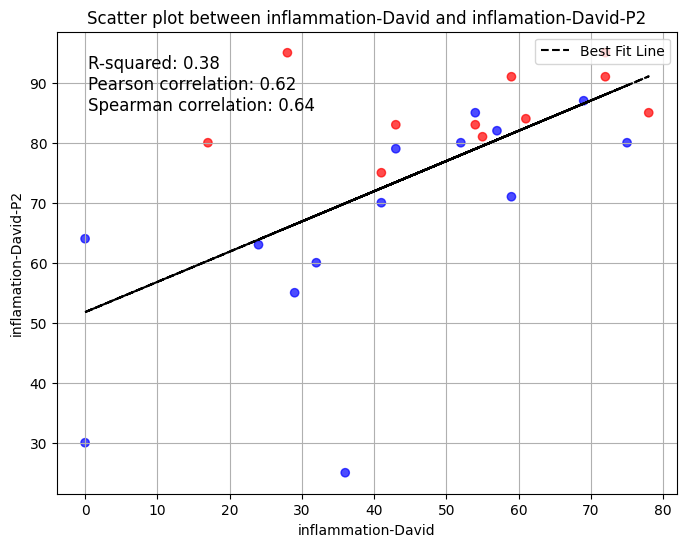

In [25]:
pairs_inflammation=[('rvas-inflammation','rvas-inflammation'),
                ('rvas-inflammation','inflammation-Amit'),
                ('rvas-inflammation','inflammation-David'),
                ('rvas-inflammation','inflamation-Namita-P2'),
                ('rvas-inflammation','inflamation-Amit-P2'),
                ('rvas-inflammation','inflamation-David-P2'),
                ('inflammation-Amit','inflamation-Amit-P2'),
                ('inflammation-David','inflamation-David-P2')]
for pairs in pairs_inflammation:
    rad_reader.scatter_with_best_fit(pairs[0],pairs[1],merged_df_ph1and2 ,color=merged_df_ph1and2['Bin_sev_inf_co70'].values)

In [26]:
'''
importlib.reload(rad_reader)
results=rad_reader.stat_comp(before_col='inflamation',after_col='inflamation-Amit-P2',target_col='severity_inflammation_vas',dataframe=merged_ph2_pruned)
import pprint
pprint.pprint(results)
import pandas as pd

results_df = pd.json_normalize(results)

output_csv_path = 'results_output.csv'

results_df.to_csv(output_csv_path, index=False)

print(f"Results have been written to {output_csv_path}")
'''

'\nimportlib.reload(rad_reader)\nresults=rad_reader.stat_comp(before_col=\'inflamation\',after_col=\'inflamation-Amit-P2\',target_col=\'severity_inflammation_vas\',dataframe=merged_ph2_pruned)\nimport pprint\npprint.pprint(results)\nimport pandas as pd\n\nresults_df = pd.json_normalize(results)\n\noutput_csv_path = \'results_output.csv\'\n\nresults_df.to_csv(output_csv_path, index=False)\n\nprint(f"Results have been written to {output_csv_path}")\n'

In [27]:
'''
fibrosis_acc=results=rad_reader.stepwise_rad_acc(rad_col='fibrosis',target_col='severity_fibrosis_vas',dataframe=merged_ph2_pruned,threshold=70)
fibrosis_ph2_acc=results=rad_reader.stepwise_rad_acc(rad_col='fibrosis-Amit-P2',target_col='severity_fibrosis_vas',dataframe=merged_ph2_pruned,threshold=70)

inf_acc=results=rad_reader.stepwise_rad_acc(rad_col='inflamation',target_col='severity_inflammation_vas',dataframe=merged_ph2_pruned,threshold=70)
inf_ph2_acc=results=rad_reader.stepwise_rad_acc(rad_col='inflamation-Amit-P2',target_col='severity_inflammation_vas',dataframe=merged_ph2_pruned,threshold=70)

print(fibrosis_acc)

# Combine the accuracy results into a single DataFrame
combined_results = pd.DataFrame({
    'Threshold': [t[0] for t in fibrosis_acc],
    'Fibrosis Accuracy': [t[1] for t in fibrosis_acc],
    'Fibrosis-Amit-P2 Accuracy': [t[1] for t in fibrosis_ph2_acc],
    'Inflammation Accuracy':[t[1] for t in inf_acc],
    'Inflammation-Amit-P2 Accuracy':[t[1] for t in inf_ph2_acc]
})

# Define the output CSV file path for combined results
combined_output_csv_path = 'combined_results_output.csv'

# Write the combined DataFrame to a CSV file
combined_results.to_csv(combined_output_csv_path, index=False)

print(f"Combined results have been written to {combined_output_csv_path}")

'''


'\nfibrosis_acc=results=rad_reader.stepwise_rad_acc(rad_col=\'fibrosis\',target_col=\'severity_fibrosis_vas\',dataframe=merged_ph2_pruned,threshold=70)\nfibrosis_ph2_acc=results=rad_reader.stepwise_rad_acc(rad_col=\'fibrosis-Amit-P2\',target_col=\'severity_fibrosis_vas\',dataframe=merged_ph2_pruned,threshold=70)\n\ninf_acc=results=rad_reader.stepwise_rad_acc(rad_col=\'inflamation\',target_col=\'severity_inflammation_vas\',dataframe=merged_ph2_pruned,threshold=70)\ninf_ph2_acc=results=rad_reader.stepwise_rad_acc(rad_col=\'inflamation-Amit-P2\',target_col=\'severity_inflammation_vas\',dataframe=merged_ph2_pruned,threshold=70)\n\nprint(fibrosis_acc)\n\n# Combine the accuracy results into a single DataFrame\ncombined_results = pd.DataFrame({\n    \'Threshold\': [t[0] for t in fibrosis_acc],\n    \'Fibrosis Accuracy\': [t[1] for t in fibrosis_acc],\n    \'Fibrosis-Amit-P2 Accuracy\': [t[1] for t in fibrosis_ph2_acc],\n    \'Inflammation Accuracy\':[t[1] for t in inf_acc],\n    \'Inflammatio

In [28]:
'''
fibrosis_auc=results=rad_reader.stepwise_rad_auc(rad_col='fibrosis',target_col='severity_fibrosis_vas',dataframe=merged_ph2_pruned,threshold=70)
fibrosis_ph2_auc=results=rad_reader.stepwise_rad_auc(rad_col='fibrosis-Amit-P2',target_col='severity_fibrosis_vas',dataframe=merged_ph2_pruned,threshold=70)

inf_auc=results=rad_reader.stepwise_rad_auc(rad_col='inflamation',target_col='severity_inflammation_vas',dataframe=merged_ph2_pruned,threshold=70)
inf_ph2_auc=results=rad_reader.stepwise_rad_auc(rad_col='inflamation-Amit-P2',target_col='severity_inflammation_vas',dataframe=merged_ph2_pruned,threshold=70)

print(fibrosis_auc,fibrosis_ph2_auc,inf_auc,inf_ph2_auc)
'''

"\nfibrosis_auc=results=rad_reader.stepwise_rad_auc(rad_col='fibrosis',target_col='severity_fibrosis_vas',dataframe=merged_ph2_pruned,threshold=70)\nfibrosis_ph2_auc=results=rad_reader.stepwise_rad_auc(rad_col='fibrosis-Amit-P2',target_col='severity_fibrosis_vas',dataframe=merged_ph2_pruned,threshold=70)\n\ninf_auc=results=rad_reader.stepwise_rad_auc(rad_col='inflamation',target_col='severity_inflammation_vas',dataframe=merged_ph2_pruned,threshold=70)\ninf_ph2_auc=results=rad_reader.stepwise_rad_auc(rad_col='inflamation-Amit-P2',target_col='severity_inflammation_vas',dataframe=merged_ph2_pruned,threshold=70)\n\nprint(fibrosis_auc,fibrosis_ph2_auc,inf_auc,inf_ph2_auc)\n"

In [33]:
#Phase 1
df_long = pd.melt(merged_df_ph1and2, id_vars=['patient_id'], value_vars=['rvas-chronic_non_inflammation_f','fibrosis-Amit' ,'fibrosis-David' ],
                  var_name='Reader', value_name='fibrosis-score')

icc = pg.intraclass_corr(data=df_long, targets='patient_id', raters='Reader', ratings='fibrosis-score')

print(icc)

#Phase 2
df_long = pd.melt(merged_df_ph1and2, id_vars=['patient_id'], value_vars=['fibrosis-Namita-P2','fibrosis-Amit-P2' ,'fibrosis-David-P2' ],
                  var_name='Reader', value_name='fibrosis-score')

icc = pg.intraclass_corr(data=df_long, targets='patient_id', raters='Reader', ratings='fibrosis-score')

print(icc)



    Type              Description       ICC         F  df1  df2      pval  \
0   ICC1   Single raters absolute  0.087011  1.285911   24   50  0.223039   
1   ICC2     Single random raters  0.103429  1.368238   24   48  0.175247   
2   ICC3      Single fixed raters  0.109327  1.368238   24   48  0.175247   
3  ICC1k  Average raters absolute  0.222341  1.285911   24   50  0.223039   
4  ICC2k    Average random raters  0.257103  1.368238   24   48  0.175247   
5  ICC3k     Average fixed raters  0.269133  1.368238   24   48  0.175247   

           CI95%  
0  [-0.13, 0.36]  
1   [-0.1, 0.37]  
2  [-0.11, 0.39]  
3   [-0.5, 0.63]  
4  [-0.38, 0.64]  
5  [-0.42, 0.65]  


In [34]:
df_long = pd.melt(merged_df_ph1and2, id_vars=['patient_id'], value_vars=['rvasinflammation','inflammation-Amit' ,'inflammation-David' ],
                  var_name='Reader', value_name='inflammation-score')
icc = pg.intraclass_corr(data=df_long, targets='patient_id', raters='Reader', ratings='inflammation-score')

print(icc)

#Phase 2
df_long = pd.melt(merged_df_ph1and2, id_vars=['patient_id'], value_vars=['fibrosis-Namita-P2','fibrosis-Amit-P2' ,'fibrosis-David-P2' ],
                  var_name='Reader', value_name='fibrosis-score')

icc = pg.intraclass_corr(data=df_long, targets='patient_id', raters='Reader', ratings='inflammation-score')

print(icc)

    Type              Description       ICC         F  df1  df2      pval  \
0   ICC1   Single raters absolute -0.194474  0.511565   24   50  0.961577   
1   ICC2     Single random raters -0.036625  0.828368   24   48  0.685615   
2   ICC3      Single fixed raters -0.060682  0.828368   24   48  0.685615   
3  ICC1k  Average raters absolute -0.954786  0.511565   24   50  0.961577   
4  ICC2k    Average random raters -0.118559  0.828368   24   48  0.685615   
5  ICC3k     Average fixed raters -0.207193  0.828368   24   48  0.685615   

           CI95%  
0  [-0.32, 0.03]  
1  [-0.14, 0.14]  
2   [-0.24, 0.2]  
3  [-2.78, 0.07]  
4  [-0.58, 0.33]  
5  [-1.35, 0.43]  
